In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 5]


In [2]:
def getHiddenUnit(db, cmd):
    nFeat = 0
    if db == "HouseA":
        nFeat = 15
    elif db == "CASAS":
        nFeat = 72
    elif db == "PAMAP":
        nFeat = 243
    elif db == "DSADS":
        nFeat = 405
    else:
        raise Exception("Unknown Dataset")
    
    step = nFeat//4
    return step * (cmd+1)

In [3]:
from scipy import stats
all_values = {}
for (nlayer, oversampling) in [("2-layer", False), ("2-layer", True), ("3-layer", True), ("3-layer", False)]:
    all_values[(nlayer, oversampling)] = {}
    
    print("**", nlayer,"**")
    for d in ["HouseA", "CASAS", "PAMAP", "DSADS"]:
        dataset = d
        folder = "../../Results/"+dataset+"/exp_offline_hidden/"+nlayer+"/"

        if oversampling:
            raw = pd.read_csv(folder+"oversamplingresults.txt")
        else:
            raw = pd.read_csv(folder+"no-oversamplingresults.txt")
            
        raw.columns = [c.strip() for c in raw.columns]

        cmd = raw["cmd"].unique()
        task_order = raw["task_order"].unique()
        method = raw["method"].unique()

        print(d, "Working")
        overallAcc = {}
        for c in cmd:
            target = raw[raw["cmd"]==c]
            agg = target.groupby('task_order').agg({"no_of_test": ["sum"], "no_of_correct_prediction": ["sum"]})
            acc = agg["no_of_correct_prediction"]["sum"]/agg["no_of_test"]["sum"]

            val = (np.nanmean(acc), stats.sem(acc, nan_policy="omit"))
            overallAcc[c] = val

        print(d, "DONE")
        all_values[(nlayer, oversampling)][d] = overallAcc

** 2-layer **
HouseA Working
HouseA DONE
CASAS Working
CASAS DONE
PAMAP Working
PAMAP DONE
DSADS Working
DSADS DONE
** 2-layer **
HouseA Working
HouseA DONE
CASAS Working
CASAS DONE
PAMAP Working
PAMAP DONE
DSADS Working
DSADS DONE
** 3-layer **
HouseA Working
HouseA DONE
CASAS Working
CASAS DONE
PAMAP Working
PAMAP DONE
DSADS Working
DSADS DONE
** 3-layer **
HouseA Working
HouseA DONE
CASAS Working
CASAS DONE
PAMAP Working
PAMAP DONE
DSADS Working
DSADS DONE


# Continual learning 

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plotline(db, title="", ylim=[0, 1]):
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.rcParams.update({'font.size': 25})
    plt.rcParams['axes.titlepad'] = 10
    
    fig, ax = plt.subplots()
    patterns = [ "-s" , "-o" , "-x" , "-D" , "-+" , "-*", "-2" ]
    
    models = [("2-layer", False), ("2-layer", True), ("3-layer", False), ("3-layer", True)]
    for conf in models:
        values = all_values[conf][db]
        cmd = values.keys()
        mval = [values[c][0] for c in cmd]
        merr = [values[c][1] for c in cmd]

        x = [getHiddenUnit(db, c) for c in cmd]
        print(mval)
        print(merr)
        ax.errorbar(x, mval, yerr=merr, fmt=patterns[0])

        mx = [values[c][0]+values[c][1] for c in cmd]
        mn = [values[c][0]-values[c][1] for c in cmd]

#     ax.fill_between(x, mn, mx, alpha=0.2)

    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xlabel("Number of hidden units per layer")
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])
    ax.set_xticklabels(x)

    ax.legend([
        "2 layers with no-oversampling",
        "2 layers with oversampling",
        "3 layers with no-oversampling",
        "3 layers with oversampling",
    ], prop={'size': 20}, loc=0)
    fig.tight_layout()
    fig.savefig(db+"-offline_hidden.pdf", bbox_inches='tight')

    plt.show()

[0.4670103092783505, 0.6298969072164948, 0.7463917525773196, 0.7391752577319588, 0.8237113402061855, 0.822680412371134, 0.8195876288659794, 0.8247422680412371]
[0.04163751770287519, 0.03361555518270514, 0.02855337192830376, 0.026531791267295688, 0.0010309278350515425, 0.0020618556701030855, 0.0027705353086936494, 0.0]
[0.5237113402061856, 0.7773195876288659, 0.8278350515463917, 0.8381443298969072, 0.868041237113402, 0.8525773195876288, 0.8494845360824742, 0.8628865979381443]
[0.04731298633538342, 0.028882338679657314, 0.013044847351273063, 0.013835616590513676, 0.0029958068340485726, 0.005334767936859117, 0.004908198232675498, 0.007378319777863874]
[0.4670103092783505, 0.6298969072164948, 0.7463917525773196, 0.7391752577319588, 0.8237113402061855, 0.822680412371134, 0.8195876288659794, 0.8247422680412371]
[0.04163751770287519, 0.03361555518270514, 0.02855337192830376, 0.026531791267295688, 0.0010309278350515425, 0.0020618556701030855, 0.0027705353086936494, 0.0]
[0.3463917525773196, 0.

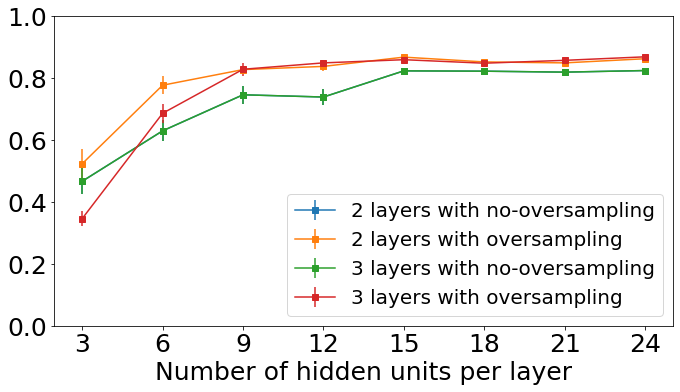

In [5]:
plotline("HouseA","")

[0.9229918958970085, 0.9367339075669168, 0.9423571177178847, 0.9416468278225432, 0.942265221820876, 0.9407518662591461, 0.9336805038436602, 0.9373685097712328]
[0.0032527059117107683, 0.001694326406643361, 0.0010929223647603995, 0.0018684716889585359, 0.0017944412049318472, 0.0018201917450520492, 0.004418610187471539, 0.003129857805536064]
[0.9221244419746226, 0.9146390941928313, 0.9322451421691209, 0.9288666851903308, 0.9353383902936001, 0.9187465499675836, 0.9264310734463276, 0.926389552653515]
[0.005163822620916583, 0.004095096039287835, 0.005140908200350901, 0.005031628092744124, 0.0050666048925333985, 0.006510067280980431, 0.0051657630859005665, 0.0038015087750955293]
[0.9229918958970085, 0.9367339075669168, 0.9423571177178847, 0.9416468278225432, 0.942265221820876, 0.9407518662591461, 0.9336805038436602, 0.9373685097712328]
[0.0032527059117107683, 0.001694326406643361, 0.0010929223647603995, 0.0018684716889585359, 0.0017944412049318472, 0.0018201917450520492, 0.004418610187471539

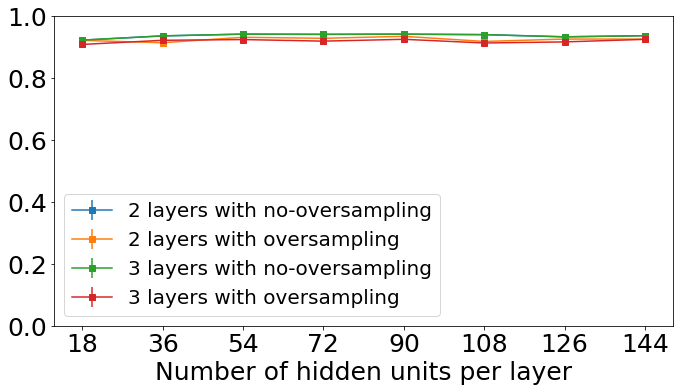

In [6]:
plotline("CASAS","")

[0.791459815546772, 0.7901943346508564, 0.8261811594202898, 0.8188880105401845, 0.8307559288537549, 0.8478119235836628, 0.8513234519104085, 0.8503201581027667]
[0.00654584670102183, 0.010449760266980104, 0.006064584875546888, 0.012106962823172569, 0.006802884222760428, 0.007474145570223889, 0.009265439364469143, 0.01009519307498635]
[0.7809440052700922, 0.8046324110671937, 0.8218580368906455, 0.8244832015810278, 0.8220125164690382, 0.8169308300395256, 0.8349749670619235, 0.8453748353096179]
[0.005817968243853943, 0.007072956035871106, 0.00984639822428822, 0.007681197123685838, 0.009868886987959938, 0.016248982338728363, 0.010690021103574344, 0.009826885717310108]
[0.791459815546772, 0.7901943346508564, 0.8261811594202898, 0.8188880105401845, 0.8307559288537549, 0.8478119235836628, 0.8513234519104085, 0.8503201581027667]
[0.00654584670102183, 0.010449760266980104, 0.006064584875546888, 0.012106962823172569, 0.006802884222760428, 0.007474145570223889, 0.009265439364469143, 0.010095193074

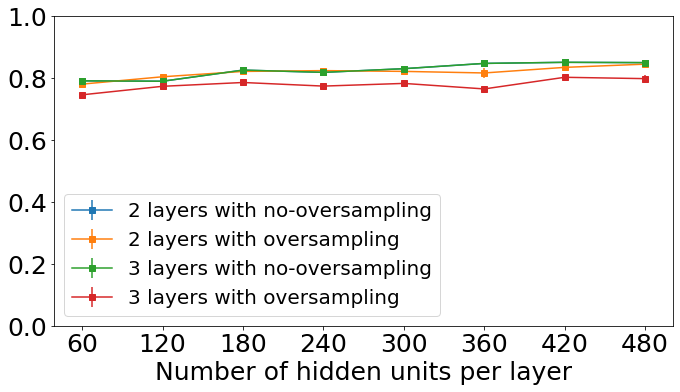

In [7]:
plotline("PAMAP","")

[0.6893544117647059, 0.692843137254902, 0.698903431372549, 0.6985299019607842, 0.7192632352941176, 0.7004916666666666, 0.7056078431372549, 0.6898867647058824]
[0.01781157554879634, 0.014939090382678278, 0.00982993428248593, 0.00783564403935167, 0.010131208612718386, 0.010352345487799635, 0.013930217652236966, 0.01963653263939971]
[0.7116186274509804, 0.7038632352941175, 0.7056338235294117, 0.7084034313725491, 0.7290176470588234, 0.7368691176470588, 0.7155161764705882, 0.7032220588235295]
[0.007857046585166704, 0.009931286479366462, 0.012831111989255451, 0.0170414916938828, 0.010643777911218033, 0.009726258761370874, 0.0104891836715972, 0.012041444560352672]
[0.6893544117647059, 0.692843137254902, 0.698903431372549, 0.6985299019607842, 0.7192632352941176, 0.7004916666666666, 0.7056078431372549, 0.6898867647058824]
[0.01781157554879634, 0.014939090382678278, 0.00982993428248593, 0.00783564403935167, 0.010131208612718386, 0.010352345487799635, 0.013930217652236966, 0.01963653263939971]
[0

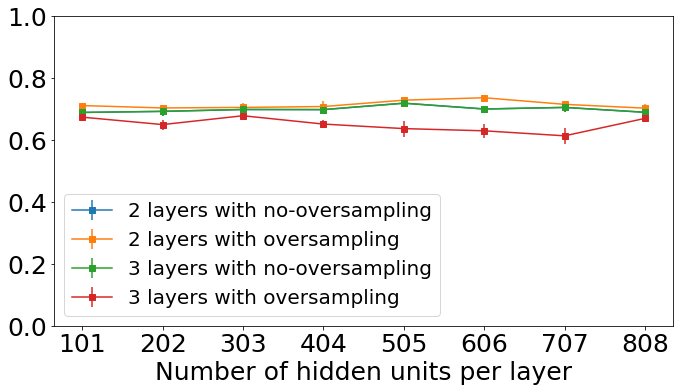

In [8]:
plotline("DSADS","")

In [9]:
# Run command
# python .\run_exp_hidden_offline.py --data-dir=housea --results-dir=./Results/HouseA/exp_offline_hidden/oversampling --task-order=./Results/HouseA/task_orders.txt
# python .\run_merge.py --data-dir=housea --results-dir=./Results/HouseA/exp_offline_hidden/oversampling
# python .\run_exp_hidden_offline.py --data-dir=casas --results-dir=./Results/CASAS/exp_offline_hidden/oversampling --task-order=./Results/CASAS/task_orders.txt
# python .\run_merge.py --data-dir=casas --results-dir=./Results/CASAS/exp_offline_hidden/oversampling
# python .\run_exp_hidden_offline.py --data-dir=pamap --results-dir=./Results/PAMAP/exp_offline_hidden/oversampling --task-order=./Results/PAMAP/task_orders.txt
# python .\run_merge.py --data-dir=pamap --results-dir=./Results/PAMAP/exp_offline_hidden/oversampling
# python .\run_exp_hidden_offline.py --data-dir=dsads --results-dir=./Results/DSADS/exp_offline_hidden/oversampling --task-order=./Results/DSADS/task_orders.txt
# python .\run_merge.py --data-dir=dsads --results-dir=./Results/DSADS/exp_offline_hidden/oversampling

# python .\run_exp_hidden_offline.py --data-dir=housea --results-dir=./Results/HouseA/exp_offline_hidden/no-oversampling --no-oversampling --task-order=./Results/HouseA/task_orders.txt
# python .\run_exp_hidden_offline.py --data-dir=casas --results-dir=./Results/CASAS/exp_offline_hidden/no-oversampling --no-oversampling --task-order=./Results/CASAS/task_orders.txt
# python .\run_exp_hidden_offline.py --data-dir=pamap --results-dir=./Results/PAMAP/exp_offline_hidden/no-oversampling --no-oversampling --task-order=./Results/PAMAP/task_orders.txt
# python .\run_exp_hidden_offline.py --data-dir=dsads --results-dir=./Results/DSADS/exp_offline_hidden/no-oversampling --no-oversampling --task-order=./Results/DSADS/task_orders.txt

# python .\run_merge.py --data-dir=housea --results-dir=./Results/HouseA/exp_offline_hidden/no-oversampling --no-oversampling
# python .\run_merge.py --data-dir=casas --results-dir=./Results/CASAS/exp_offline_hidden/no-oversampling --no-oversampling
# python .\run_merge.py --data-dir=pamap --results-dir=./Results/PAMAP/exp_offline_hidden/no-oversampling --no-oversampling
# python .\run_merge.py --data-dir=dsads --results-dir=./Results/DSADS/exp_offline_hidden/no-oversampling --no-oversampling